# 🧠 Perceptron et séparabilité linéaire

Ce notebook vous permet de **visualiser l'effet des poids $w_1$, $w_2$ et du biais $b$** sur la séparation de deux classes.

## 🎯 Objectifs :
1. Simuler des **données linéairement séparables** et ajuster la frontière de décision.
2. Montrer pourquoi le perceptron **ne peut pas résoudre le problème XOR** (non-linéairement séparable).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Données linéairement séparables
X = np.array([[1,2], [2,3], [3,1.5], [6,5], [7,8], [8,6]])
y = np.array([0, 0, 0, 1, 1, 1])

def plot_decision_boundary(w1=1.0, w2=1.0, b=0.0):
    plt.figure(figsize=(6,6))
    
    # Affichage des points
    for i, (xi, yi) in enumerate(zip(X, y)):
        if yi == 0:
            plt.scatter(*xi, c='red', label="Classe 0" if i == 0 else "", s=80, edgecolors='k')
        else:
            plt.scatter(*xi, c='blue', label="Classe 1" if i == 3 else "", s=80, edgecolors='k')

    
    # Ligne de séparation w1*x1 + w2*x2 + b = 0 <=> x2 = -(w1*x1 + b)/w2
    # car f=0 est la ligne de décision de heaviside fct d'activation 0 ou 1
    x_values = np.linspace(0, 10, 100)
    if w2 != 0:
        y_values = -(w1 * x_values + b) / w2
        plt.plot(x_values, y_values, 'k--', label="Frontière de décision")
    
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.legend()
    plt.title("Simulation : séparation linéaire")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

interact(plot_decision_boundary,
         w1=FloatSlider(value=1.0, min=-5, max=5, step=0.1),
         w2=FloatSlider(value=1.0, min=-5, max=5, step=0.1),
         b=FloatSlider(value=0.0, min=-10, max=10, step=0.5));


interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

## ❌ Problème XOR : pourquoi le perceptron échoue

Voyons maintenant le problème XOR (ou exclusif) classique. 
- 💡 XOR retourne 1 si une seule des deux entrées vaut 1, sinon 0.   

On positionne les points dans le plan :

- $(0,0)$ et $(1,1)$ doivent être classés **0**
- $(0,1)$ et $(1,0)$ doivent être classés **1**

Aucune **droite** ne peut séparer proprement ces deux groupes.

Essayez par vous-même ci-dessous.


In [2]:
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0,1,1,0])

def plot_xor(w1=1.0, w2=1.0, b=0.0):
    plt.figure(figsize=(6,6))
    
    for i, (xi, yi) in enumerate(zip(X_xor, y_xor)):
        if yi == 0:
            plt.scatter(*xi, c='red', label="Classe 0" if i == 0 else "", s=100, edgecolors='k')
        else:
            plt.scatter(*xi, c='blue', label="Classe 1" if i == 1 else "", s=100, edgecolors='k')

    x_values = np.linspace(-0.5, 1.5, 100)
    if w2 != 0:
        y_vals = -(w1 * x_values + b) / w2
        plt.plot(x_values, y_vals, 'k--', label="Frontière de décision")

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.title("Problème XOR : non séparabilité linéaire")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

interact(plot_xor,
         w1=FloatSlider(value=1.0, min=-5, max=5, step=0.1),
         w2=FloatSlider(value=1.0, min=-5, max=5, step=0.1),
         b=FloatSlider(value=0.0, min=-5, max=5, step=0.1));


interactive(children=(FloatSlider(value=1.0, description='w1', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

## 🧪 Code : Résolution du problème XOR 
- avec une fonction d’activation non-linéaire (MLP Multi Layer Perceptron + Tanh ou ReLU)

Prédictions : [0 1 1 0]
Précision   : 1.0


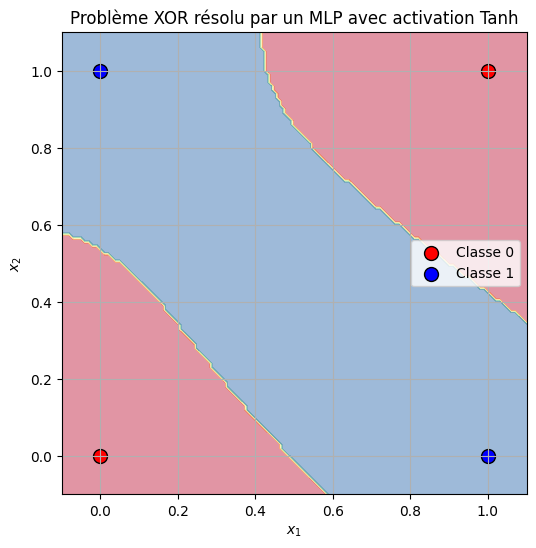

In [6]:
# MODIFICATION : script XOR avec MLP et fonction d’activation ReLU ou Tanh
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Données XOR
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0,1,1,0])

# Modèle MLP (2 couches cachées avec 4 neurones chacune)
model = MLPClassifier(hidden_layer_sizes=(4,4), activation='tanh', max_iter=5000, random_state=0)

# Entraînement
model.fit(X_xor, y_xor)

# Prédiction
y_pred = model.predict(X_xor)
print("Prédictions :", y_pred)
print("Précision   :", accuracy_score(y_xor, y_pred))

# Visualisation de la frontière de décision
h = 0.01
x_min, x_max = X_xor[:, 0].min() - 0.1, X_xor[:, 0].max() + 0.1
y_min, y_max = X_xor[:, 1].min() - 0.1, X_xor[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)

# Affichage des points
for i, (xi, yi) in enumerate(zip(X_xor, y_xor)):
    color = 'red' if yi == 0 else 'blue'
    label = f"Classe {yi}" if i in [0,1] else None
    plt.scatter(*xi, c=color, s=100, edgecolors='k', label=label)

plt.title("Problème XOR résolu par un MLP avec activation Tanh")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend()
plt.show()


---
## Pourquoi un réseau de neurones avec activation Heaviside échoue sur le problème XOR

Le problème **XOR** n'est **pas linéairement séparable**.  
Pour le résoudre, un réseau de neurones doit pouvoir :
- **Créer des frontières non linéaires** dans l'espace d'entrée.
- **Combiner des transformations** pour plier l'espace et séparer les classes.

Or, si on utilise une **fonction d'activation Heaviside** (fonction échelon) :
- Elle est **non dérivable** : impossible de calculer des gradients utiles pour apprendre.
- Elle est **discontinue** : le réseau ne peut faire que des séparations **brusques**, comme des lignes droites.
- La descente de gradient **échoue** : soit les poids ne bougent pas, soit ils explosent.

Au contraire, une fonction comme **tanh** :
- Est **continue** et **dérivable partout**,
- Permet des **petites variations** progressives,
- Permet au réseau de **composer des transformations complexes** pour plier l'espace.

**Conclusion** :  
➔ Avec **Heaviside**, un MLP ne peut pas apprendre le XOR efficacement.  
➔ Avec **tanh** (ou ReLU, ou sigmoid), l'apprentissage devient possible.



Prédictions après Heaviside : [1 1 0 0]
Précision                   : 0.5


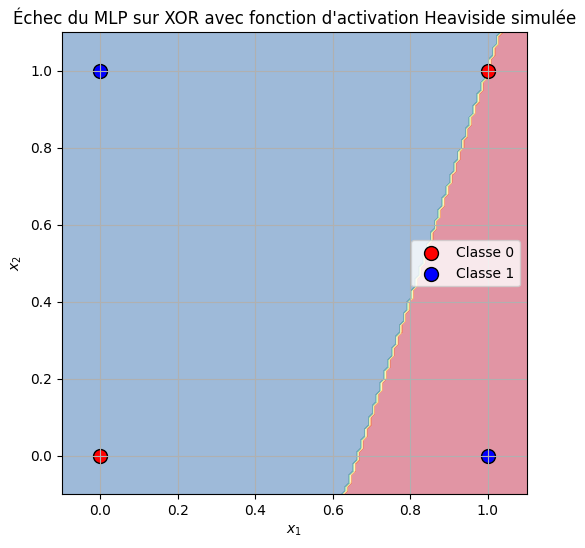

In [ ]:
# Cellule Code : Réseau échouant avec activation Heaviside sur XOR

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Données XOR
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0,1,1,0])

# Modèle MLP (activation "identity" pour simuler Heaviside après)
model = MLPClassifier(hidden_layer_sizes=(4,4),
                      activation='identity',  # Activation linéaire pour simuler brut
                      max_iter=5000,
                      random_state=0)

# Entraînement
model.fit(X_xor, y_xor)

# MODIFICATION : fonction Heaviside simulée sur les sorties du modèle
# x = np.array([5,-2]) tableau numpy => heaviside(x) = [1,0] en sortie (1 si >0 et 0 si <0)
def heaviside(x):
    return (x > 0).astype(int)

# Prédiction brute + passage par Heaviside
raw_outputs = model.predict(X_xor)  # Attention : predict() applique déjà softmax, donc en vrai ça marche mal ici
y_pred_heaviside = heaviside(model.predict_proba(X_xor)[:,1] - 0.5)  # Seuil à 0.5 pour classe 1

print("Prédictions après Heaviside :", y_pred_heaviside)
print("Précision                   :", accuracy_score(y_xor, y_pred_heaviside))

# Visualisation (facultatif mais parlant)
h = 0.01
x_min, x_max = X_xor[:, 0].min() - 0.1, X_xor[:, 0].max() + 0.1
y_min, y_max = X_xor[:, 1].min() - 0.1, X_xor[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Prédiction sur toute la grille
Z = heaviside(model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] - 0.5)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)

# Points de données
for i, (xi, yi) in enumerate(zip(X_xor, y_xor)):
    color = 'red' if yi == 0 else 'blue'
    label = f"Classe {yi}" if i in [0,1] else None
    plt.scatter(*xi, c=color, s=100, edgecolors='k', label=label)

plt.title("Échec du MLP sur XOR avec fonction d'activation Heaviside simulée")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend()
plt.show()
